In [152]:
import matplotlib.pyplot as plt
import pathlib
import requests
import os
import numpy as np
import pathlib
import PIL


import tensorflow as tf
import cv2        as cv
import numpy      as np

from fastapi                  import FastAPI,File, UploadFile
from fastapi.middleware.cors  import CORSMiddleware
#from mushroom_learning.gcp    import get_model

from tensorflow               import keras
from tensorflow.keras         import utils


# Checking API

In [140]:
URL_base    = 'https://mushroom-docker-lpuaioudtq-ew.a.run.app/'
URL_base    = 'http://127.0.0.1:8000/'
URL_size    = URL_base+"size/"
URL_predict = URL_base+"predict/"

print(URL_size)
print(URL_predict)

http://127.0.0.1:8000/size/
http://127.0.0.1:8000/predict/


In [149]:
! ls -rtlh 10252_Amanita_muscaria/FDE2014PIC30286365.JPG

-rwxr-xr-x 1 danielsptanner danielsptanner 130K Mar 27  2018 10252_Amanita_muscaria/FDE2014PIC30286365.JPG


In [144]:
image=PIL.Image.open('10252_Amanita_muscaria/FDE2014PIC30286365.JPG')
print(type(image))
image_array = np.array(image)
print(image_array.shape)
print(f'So every row has 1024 columns, each with a depth of 3, total elements:{657*1024*3}')
print(f'\nThese are not bytes, as this does not bear a fixed relation to the filesize: {2018304/59836}')

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(563, 770, 3)
So every row has 1024 columns, each with a depth of 3, total elements:2018304

These are not bytes, as this does not bear a fixed relation to the filesize: 33.73059696503777


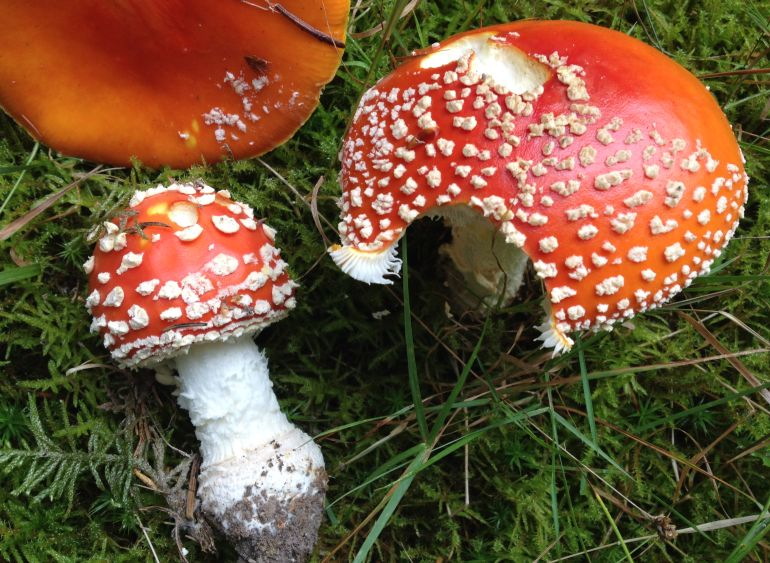

In [162]:
amanite=pathlib.Path('10252_Amanita_muscaria/FDE2014PIC30286365.JPG')
PIL.Image.open(str(amanite))

In [163]:
with open(amanite, 'rb') as f:
    byte_im = f.read()
print(type(byte_im))
byte_im_array=np.asarray(bytearray(byte_im), dtype="uint8")
print(type(byte_im_array))

<class 'bytes'>
<class 'numpy.ndarray'>


In [166]:
files = {'mush': byte_im}
response = requests.get(URL_size,data=files)
print(response.json())

This file is 232.558 Kbytes


In [165]:
response=requests.get(URL_predict,data=files)
print(response)

<Response [500]>


## uvicorn run locally

### Check base URL

In [146]:
URL_base    = 'http://127.0.0.1:8000/'
URL_size    = URL_base+"size/"
URL_predict = URL_base+"predict/"

In [36]:
response = requests.get(URL_base)
print(response.json())

["Don't eat that mushroom!"]


## Check image size

To really test how it will be in production, we need to put this notebook somewhere it can see the image, but the api cannot.

In [137]:
image_path='SOT2017-9227795_SkdC68zaW.JPG'
print(image_path)
! ls -rtlh SOT2017-9227795_SkdC68zaW.JPG
files={'mush':image_path}

SOT2017-9227795_SkdC68zaW.JPG
-rwxr-xr-x 1 danielsptanner danielsptanner 86K Mar  8 17:28 SOT2017-9227795_SkdC68zaW.JPG


In [127]:
files = {'mush': open('/home/danielsptanner/APE2017-9186528_HyZ-iZy6vg.JPG', 'rb')}
response = requests.get(URL_size,data=files)
print(response.json())

This file is 0.575 Kbytes


In [128]:
files = {'mush': '/home/danielsptanner/APE2017-9186528_HyZ-iZy6vg.JPG'}
response = requests.get(URL_size,data=files)
print(response.json())

This file is 0.051 Kbytes


In [125]:
files = {'mush': open('/home/danielsptanner/APE2017-9186528_HyZ-iZy6vg.JPG', 'rb')}
response = requests.post(URL_predict, files=files)
print(response)

<Response [500]>


In [104]:
response = requests.get(URL_predict,data=files)
print(response)

<Response [500]>


In [65]:
#response = requests.get(URL_predict,data={'mush':image_path})
#print(response)
#print(response.json())

In [18]:
image_path='APE2017-9186528_HyZ-iZy6vg.JPG'
with open(image_path, 'rb') as f:
        im_API = f.read()
type(im_API)

bytes

In [19]:
type(bytearray(im_API))

bytearray

In [67]:

file=open(image_path,'rb')
#files = {'mush': bytearray(open(image_path,'rb'))  }

response = requests.get(URL_size,data={'mush':bytearray(im_API)})
print(response)

FileNotFoundError: [Errno 2] No such file or directory: '~/APE2017-9186528_HyZ-iZy6vg.JPG'

In [11]:
response = requests.get(URL_size,data={'mush':image_path})
print(response.json())

JSONDecodeError: [Errno Expecting value] <!DOCTYPE html>
<html lang=en>
  <meta charset=utf-8>
  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">
  <title>Error 400 (Bad Request)!!1</title>
  <style>
    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-repeat;margin-left:-5px}@media only screen and (min-resolution:192dpi){#logo{background:url(//www.google.com/images/branding/googlelogo/2x/googlelogo_color_150x54dp.png) no-repeat 0% 0%/100% 100%;-moz-border-image:url(//www.google.com/images/branding/googlelogo/2x/googlelogo_color_150x54dp.png) 0}}@media only screen and (-webkit-min-device-pixel-ratio:2){#logo{background:url(//www.google.com/images/branding/googlelogo/2x/googlelogo_color_150x54dp.png) no-repeat;-webkit-background-size:100% 100%}}#logo{display:inline-block;height:54px;width:150px}
  </style>
  <a href=//www.google.com/><span id=logo aria-label=Google></span></a>
  <p><b>400.</b> <ins>That’s an error.</ins>
  <p>Your client has issued a malformed or illegal request.  <ins>That’s all we know.</ins>
: 0

## Check prediction

In [83]:
files = {'mush': image_path}
response = requests.get(URL_predict,data=files)
print(response.json())

This mushroom is most likely poisonous. Score: 0.64


### Check prediction against local model.

In [87]:
def image_API(im_path,size):
    # convert to bites (this step should be excluded in an actual API, as the
    # image arrives in bytes from the get or post functions.)
    with open(im_path, 'rb') as f:
        im_API = f.read()
    # convert to np array.    
    im_API=np.asarray(bytearray(im_API), dtype="uint8")
    # decode byte array back into image, and then adjust
    # for cv's automatic BGR representation
    im_API = cv.imdecode(im_API,cv.IMREAD_COLOR)
    im_API = cv.cvtColor(im_API , cv.COLOR_BGR2RGB)
    
    # resize using tensor flow with nearest neighbour interpolation
    im_API=tf.image.resize(im_API,size, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    # Expand for CNN
    im_API = tf.expand_dims(im_API, 0) 
    
    return im_API

In [94]:
im_API=image_API(image_path,(224,224))
model=get_model()

../our_first_model


In [96]:
prediction_API=model.predict(im_API)
classif_API = int(prediction_API > .5)
print(f'{prediction_API[0][0]:.5f}:{("poison","edible")[classif_API]}')

0.63804:edible
